In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from scripts import utils
from scripts import fallalld, classifiers

In [6]:
df, mean, aggr = classifiers.cross_validate(fallalld, models_subset=['ExtraTrees', 'LogisticCV'], cv=2)
df


Fold 0 --------------
Train set: X: (787, 1666), y: (787,)        ([ADLs, Falls]) [572 215]
Test set: X: (958, 1666), y: (958,)        ([ADLs, Falls]) [707 251]
> ExtraTrees        (win_size=6545)	Training/Testing in 0.38 secs.
> LogisticCV        (win_size=6545)	Training/Testing in 4.23 secs.

Fold 1 --------------
Train set: X: (1068, 1666), y: (1068,)        ([ADLs, Falls]) [789 279]
Test set: X: (677, 1666), y: (677,)        ([ADLs, Falls]) [490 187]
> ExtraTrees        (win_size=6545)	Training/Testing in 0.67 secs.
> LogisticCV        (win_size=6545)	Training/Testing in 1.12 secs.


,model,window_size,runtime,precision,recall,f1-score,fold
0,ExtraTrees,6545,0.38,0.96,0.78,0.86,0
1,LogisticCV,6545,4.23,0.90,0.68,0.78,0
2,ExtraTrees,6545,0.67,0.82,0.96,0.89,1
3,LogisticCV,6545,1.12,0.80,0.97,0.87,1


In [7]:
aggr

,model,window_size,runtime,precision,recall,f1-score
0,ExtraTrees,6545.0$\pm$0.0,0.52$\pm$0.21,0.89$\pm$0.1,0.87$\pm$0.13,0.88$\pm$0.02
1,LogisticCV,6545.0$\pm$0.0,2.68$\pm$2.2,0.85$\pm$0.07,0.82$\pm$0.21,0.82$\pm$0.06


Train set: X: (1240, 1666), y: (1240,)    ([ADLs, Falls]) [887 353]
Test set: X: (505, 1666), y: (505,)    ([ADLs, Falls]) [392 113]


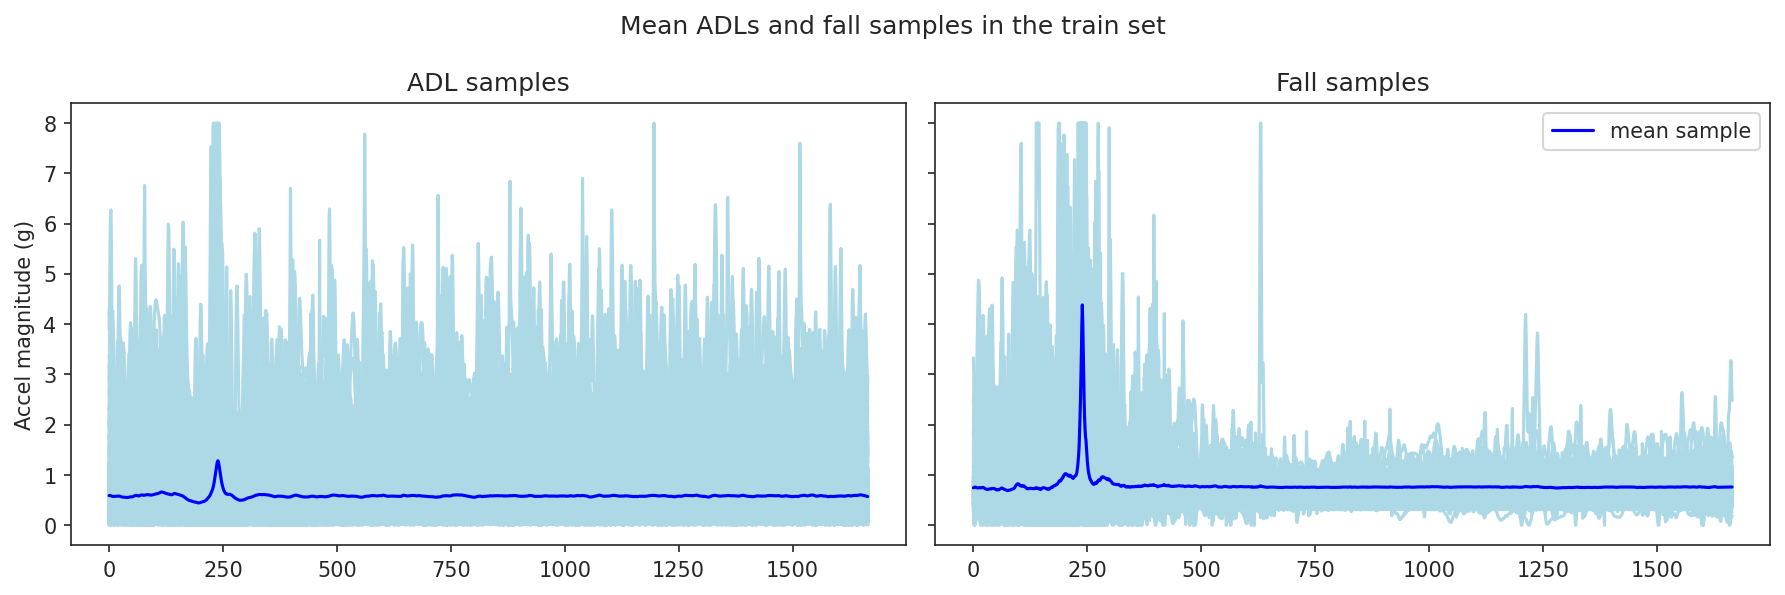

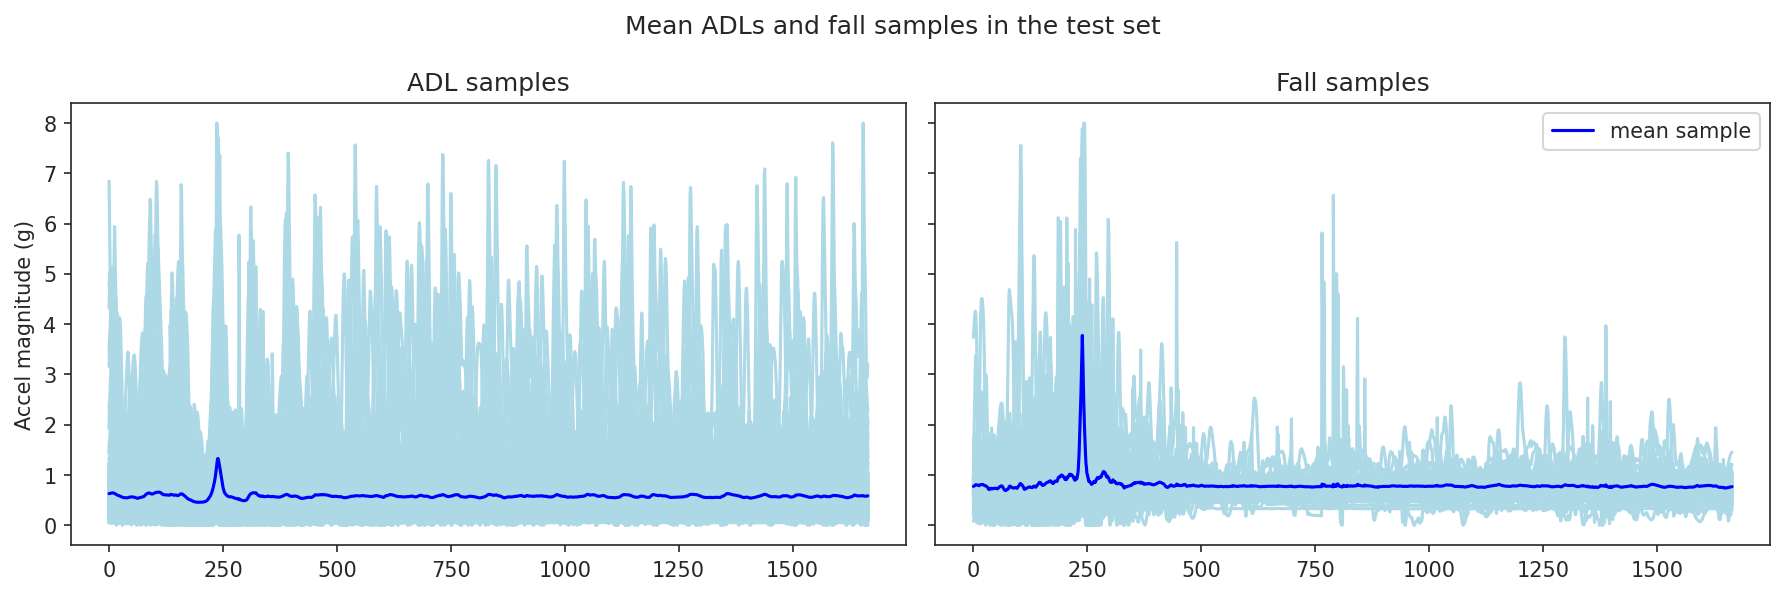

In [4]:
X_train, y_train, X_test, y_test = fallalld.train_test_subjects_split()

In [6]:
tabular_metrics = classifiers.run_tabular_models(
  X_train, y_train, X_test, y_test, window_size=1666)

> Logistic          (win_size=1666)	Training/Testing in 0.79 secs.
> RandomForest      (win_size=1666)	Training/Testing in 3.07 secs.
> KNN               (win_size=1666)	Training/Testing in 0.07 secs.
> Ridge             (win_size=1666)	Training/Testing in 0.03 secs.
> ExtraTrees        (win_size=1666)	Training/Testing in 0.51 secs.


In [7]:
tabular_metrics.to_csv(r'results/tabular_simulated_1666.csv')
tabular_metrics

,model,window_size,runtime,precision,recall,f1-score
0,Logistic,1666,0.788937,0.830357,0.823009,0.826667
1,RandomForest,1666,3.074392,0.834711,0.893805,0.863248
2,KNN,1666,0.072241,0.867647,0.522124,0.651934
3,Ridge,1666,0.031465,0.757009,0.716814,0.736364
4,ExtraTrees,1666,0.510703,0.871795,0.902655,0.886957


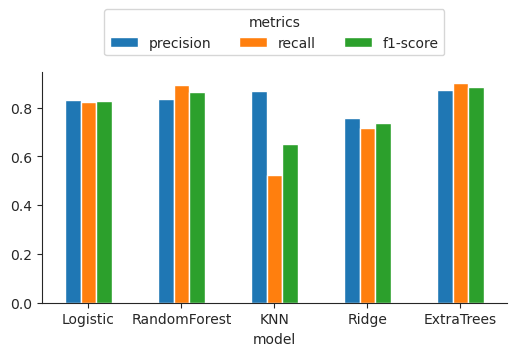

In [10]:
classifiers.plot_metrics(tabular_metrics, figsize=(6,3))
sns.despine()

In [11]:
ts_metrics = classifiers.run_ts_models(
  X_train, y_train, X_test, y_test, window_size=1666)

2024-06-02 16:16:29.152916: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-02 16:16:29.179297: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-02 16:25:39.646625: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


> Hydra             (win_size=1666)	Training/Testing in 39.23 secs.
> Rocket            (win_size=1666)	Training/Testing in 8.67 secs.
> MultiRocketHydra  (win_size=1666)	Training/Testing in 49.29 secs.
> FCN               (win_size=1666)	Training

2024-06-02 16:37:11.992169: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
in 321.51 secs.
> Catch22           (win_size=1666)	Training/Testing in 85.19 secs.
> QUANT             (win_size=1666)	Training/Testing in 25.79 secs.
> DrCIF             (win_size=1666)	Training/Testing in 8679.24 secs.


In [12]:
ts_metrics.to_csv(r'results/ts_simulated_1666.csv')
ts_metrics

,model,window_size,runtime,precision,recall,f1-score
0,Hydra,1666,39.226349,0.953704,0.911504,0.932127
1,Rocket,1666,8.667765,0.920354,0.920354,0.920354
2,MultiRocketHydra,1666,49.292490,0.954128,0.920354,0.936937
3,FCN,1666,321.512640,0.388489,0.955752,0.552430
4,Catch22,1666,85.191709,0.918919,0.902655,0.910714
5,QUANT,1666,25.790564,0.912281,0.920354,0.916300
6,DrCIF,1666,8679.236524,0.898305,0.938053,0.917749
